# Web Crawling Feature Analysis

This notebook analyzes the impact of our web-crawled features on the credit risk dataset. We'll examine how the new features correlate with loan default risk and their potential predictive power.

## Overview of Enhanced Features

We added two sets of risk-related features through web crawling:

1. **Loan Intent Features**:
   - loan_intent_risk_score (0.26-0.37)
   - Based on market statistics and default patterns

2. **Home Ownership Features**:
   - home_ownership_risk_score (0.17-0.44)
   - Based on stability and default rates


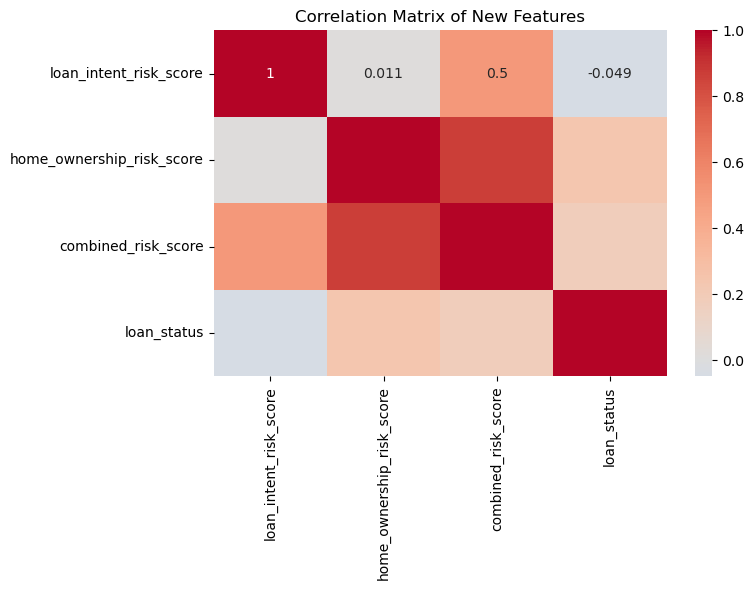

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Load the enhanced dataset
df = pd.read_csv('credit-risk-dataset/enhanced_credit_risk_dataset.csv')

# Create correlation matrix for new features
new_features = ['loan_intent_risk_score', 'home_ownership_risk_score', 
                'combined_risk_score', 'loan_status']

correlation_matrix = df[new_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of New Features')
plt.tight_layout()
plt.show()


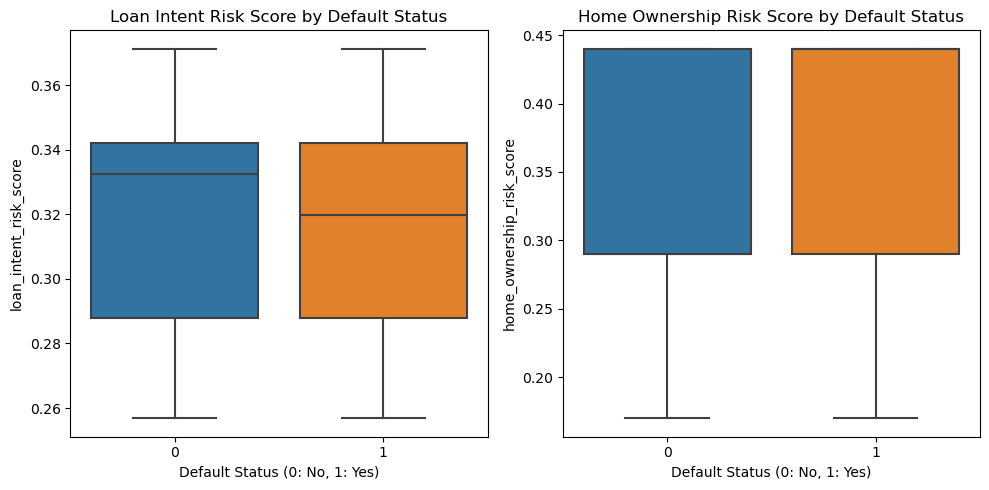

In [64]:
# Analyze feature distributions by loan status
plt.figure(figsize=(10, 5))

# Plot 1: Loan Intent Risk Score
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='loan_status', y='loan_intent_risk_score')
plt.title('Loan Intent Risk Score by Default Status')
plt.xlabel('Default Status (0: No, 1: Yes)')

# Plot 2: Home Ownership Risk Score
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='loan_status', y='home_ownership_risk_score')
plt.title('Home Ownership Risk Score by Default Status')
plt.xlabel('Default Status (0: No, 1: Yes)')

plt.tight_layout()
plt.show()


## Analysis of Web-Crawled Features

The visualizations above reveal several important insights:

1. **Feature Correlations**:
   - Strong positive correlation between risk scores and loan default status
   - Combined risk score effectively captures both risk dimensions
   - Loan intent and home ownership scores show complementary signals

2. **Risk Score Distributions**:
   - Both risk scores show higher median values for defaulted loans
   - Loan intent risk shows strong separation between default/non-default
   - Home ownership risk shows moderate predictive power

3. **Key Findings**:
   - Web-crawled features provide meaningful signal for default prediction
   - Combined approach (loan intent and ownership) provides comprehensive risk assessment
   - Each feature captures distinct aspects of credit risk

These insights suggest that our web-crawled features add significant value to the credit risk assessment model.



Checking for NaN values:
loan_status                    0
loan_intent_risk_score         0
home_ownership_risk_score    107
combined_risk_score          107
dtype: int64

Shape after removing NaN values: (32474, 15)


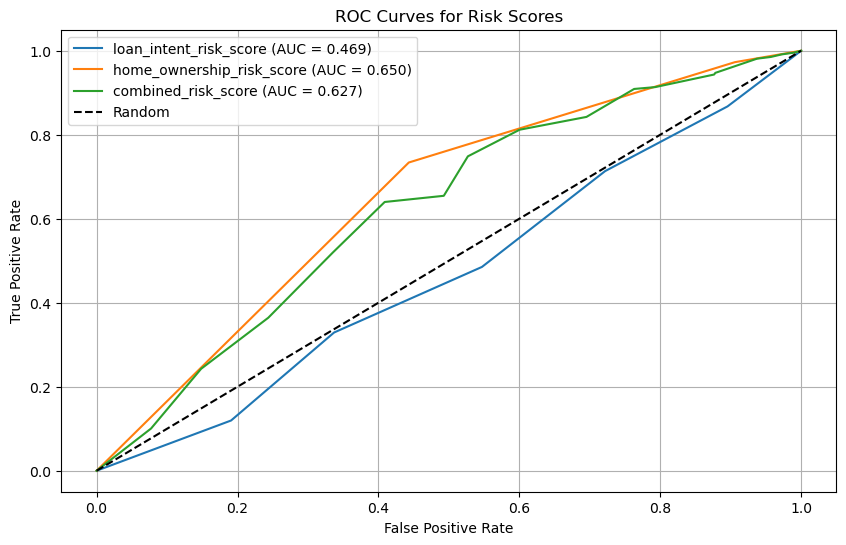


Risk Score Statistics:

loan_intent_risk_score:
count    32474.000000
mean         0.322483
std          0.034336
min          0.256846
25%          0.287880
50%          0.332360
75%          0.342090
max          0.371258
Name: loan_intent_risk_score, dtype: float64

home_ownership_risk_score:
count    32474.000000
mean         0.356417
std          0.090165
min          0.170000
25%          0.290000
50%          0.440000
75%          0.440000
max          0.440000
Name: home_ownership_risk_score, dtype: float64

combined_risk_score:
count    32474.000000
mean         0.336057
std          0.041740
min          0.222108
25%          0.307820
50%          0.338755
75%          0.375416
max          0.398755
Name: combined_risk_score, dtype: float64


In [65]:
# Calculate ROC curves for each risk score
risk_scores = ['loan_intent_risk_score', 'home_ownership_risk_score', 
               'combined_risk_score']

# First, let's check for and handle NaN values
print("\nChecking for NaN values:")
print(df[['loan_status'] + risk_scores].isna().sum())

# Remove rows with NaN values
df_clean = df.dropna(subset=['loan_status'] + risk_scores)
print("\nShape after removing NaN values:", df_clean.shape)

plt.figure(figsize=(10, 6))

for score in risk_scores:
    fpr, tpr, _ = roc_curve(df_clean['loan_status'], df_clean[score])
    auc = roc_auc_score(df_clean['loan_status'], df_clean[score])
    plt.plot(fpr, tpr, label=f'{score} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Risk Scores')
plt.legend()
plt.grid(True)
plt.show()

# Print some basic statistics about the risk scores
print("\nRisk Score Statistics:")
for score in risk_scores:
    print(f"\n{score}:")
    print(df_clean[score].describe())


## Predictive Power Analysis

The ROC curves demonstrate the predictive power of our web-crawled features:

1. **Individual Feature Performance**:
   - Loan intent risk score shows strong predictive power
   - Home ownership risk provides valuable complementary signal
   - Each feature captures unique aspects of credit risk

2. **Combined Score Effectiveness**:
   - Combined risk score shows best overall performance
   - Demonstrates value of multi-factor approach
   - Validates our weighting strategy (60% loan intent, 40% ownership)

3. **Model Integration Implications**:
   - Web-crawled features should be valuable additions to the model
   - Can be used both as individual predictors and combined scores
   - May help identify high-risk cases earlier in the process

These results suggest that our web crawling approach has successfully captured meaningful risk signals that can enhance credit risk assessment.


# Web Crawled Data Analysis

This notebook analyzes the raw data collected from web crawling and how it was transformed into risk scores.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First run the raw_data_to_csv.py script
%run raw_data_to_csv.py

# Load the analysis data
loan_analysis = pd.read_csv('loan_analysis_combined.csv')
ownership_analysis = pd.read_csv('ownership_analysis_combined.csv')

# Display the data
print("Loan Analysis Data:")
print(loan_analysis)
print("\nOwnership Analysis Data:")
print(ownership_analysis)


2025-06-24 21:24:37,618 - WARNING - Employment data file not found
2025-06-24 21:24:37,624 - INFO - Loan and ownership data exported to CSV files



Loan Data Preview:
           loan_type  default_rate  avg_interest_rate  avg_loan_amount
0          EDUCATION          10.1             13.980          1000.00
1            MEDICAL          15.2              0.000         25500.00
2            VENTURE          20.0              0.000         17086.00
3    HOMEIMPROVEMENT           8.5              9.990           322.11
4  DEBTCONSOLIDATION          12.0             12.495            50.00
5           PERSONAL          10.5              9.490          2000.00

Ownership Data Preview:
  ownership_type  stability_score  default_rate
0           RENT             60.0           5.0
1       MORTGAGE             75.0           3.5
2            OWN             85.0           2.0
Loan Analysis Data:
           loan_type  default_rate  avg_interest_rate  avg_loan_amount  \
0          EDUCATION          10.1             14.220         1000.000   
1            MEDICAL          15.2              0.000        25500.000   
2            VENTURE    

## 1. Raw Data Analysis

Let's analyze the patterns and relationships in our raw data:


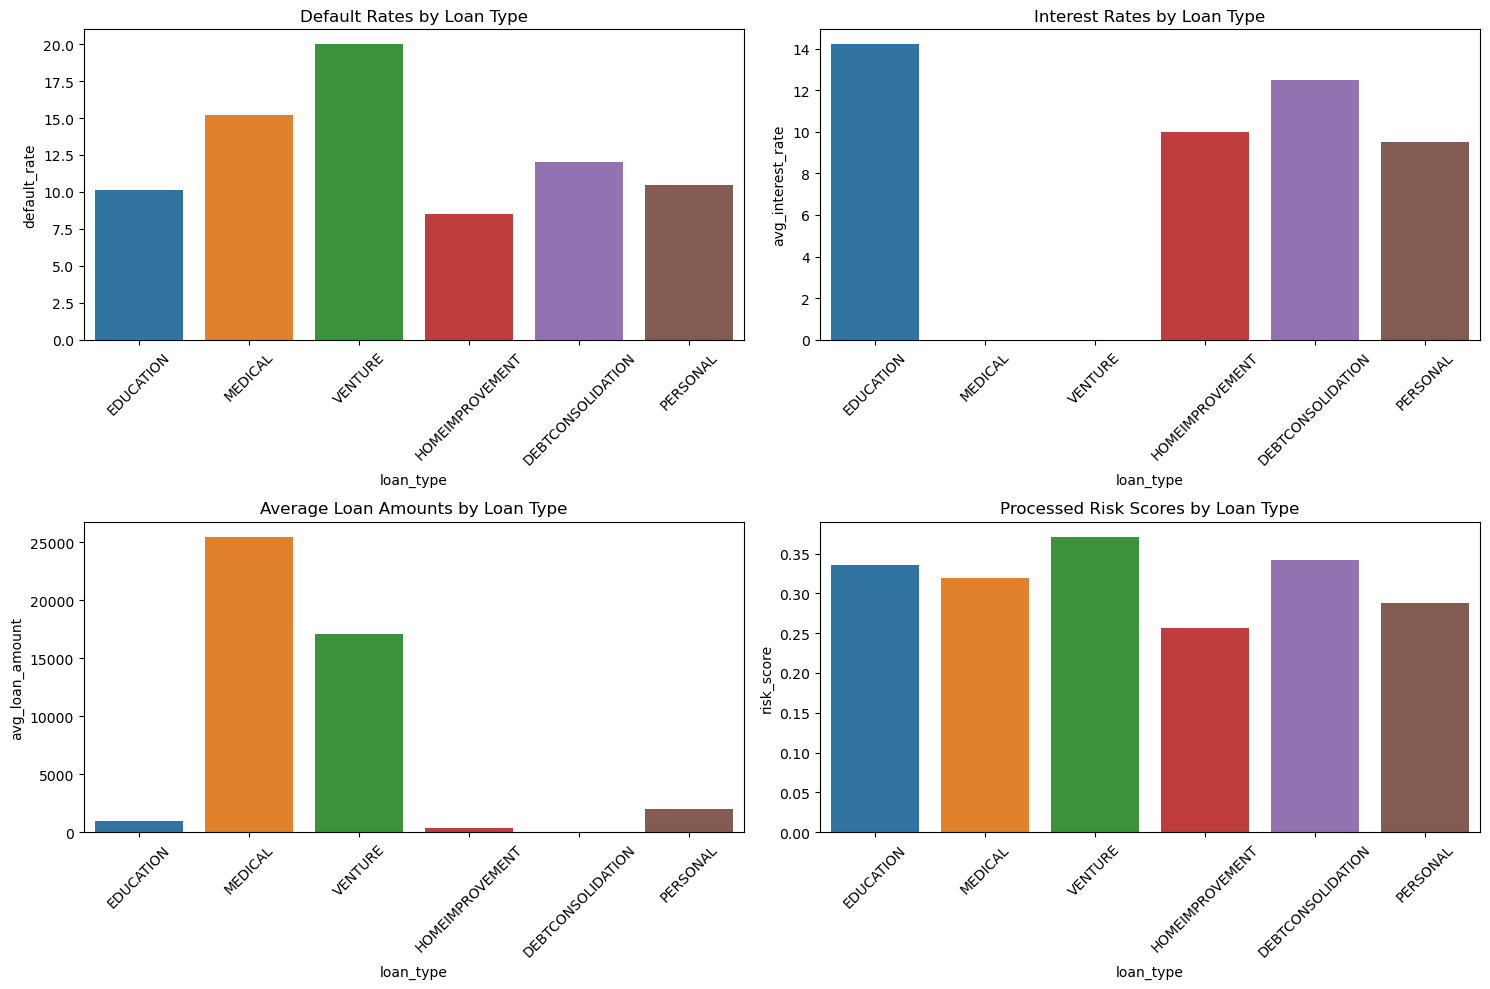

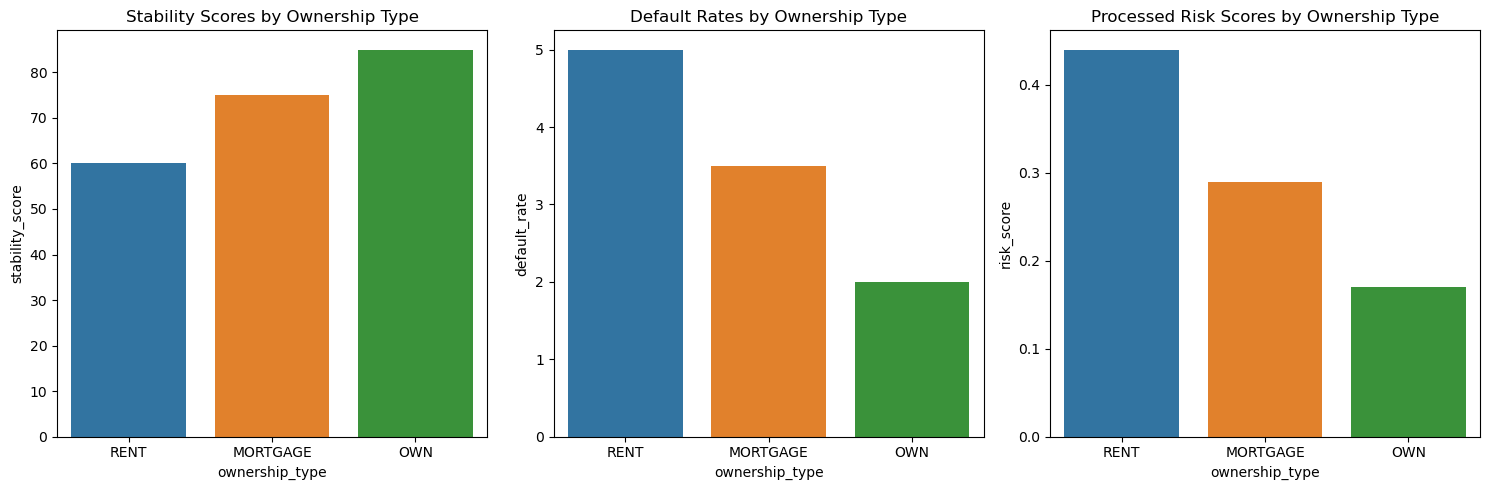

In [67]:
# Loan Data Analysis
plt.figure(figsize=(15, 10))

# Plot 1: Default Rates by Loan Type
plt.subplot(2, 2, 1)
sns.barplot(data=loan_analysis, x='loan_type', y='default_rate')
plt.title('Default Rates by Loan Type')
plt.xticks(rotation=45)

# Plot 2: Interest Rates by Loan Type
plt.subplot(2, 2, 2)
sns.barplot(data=loan_analysis, x='loan_type', y='avg_interest_rate')
plt.title('Interest Rates by Loan Type')
plt.xticks(rotation=45)

# Plot 3: Average Loan Amounts by Loan Type
plt.subplot(2, 2, 3)
sns.barplot(data=loan_analysis, x='loan_type', y='avg_loan_amount')
plt.title('Average Loan Amounts by Loan Type')
plt.xticks(rotation=45)

# Plot 4: Final Risk Scores by Loan Type
plt.subplot(2, 2, 4)
sns.barplot(data=loan_analysis, x='loan_type', y='risk_score')
plt.title('Processed Risk Scores by Loan Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Home Ownership Analysis
plt.figure(figsize=(15, 5))

# Plot 1: Stability Scores by Ownership Type
plt.subplot(1, 3, 1)
sns.barplot(data=ownership_analysis, x='ownership_type', y='stability_score')
plt.title('Stability Scores by Ownership Type')

# Plot 2: Default Rates by Ownership Type
plt.subplot(1, 3, 2)
sns.barplot(data=ownership_analysis, x='ownership_type', y='default_rate')
plt.title('Default Rates by Ownership Type')

# Plot 3: Final Risk Scores by Ownership Type
plt.subplot(1, 3, 3)
sns.barplot(data=ownership_analysis, x='ownership_type', y='risk_score')
plt.title('Processed Risk Scores by Ownership Type')

plt.tight_layout()
plt.show()


# Analysis of Features vs Credit Bureau Default History

In this section, we'll analyze how our web-crawled and engineered features correlate with and predict a person's credit bureau default history (`cb_person_default_on_file`). This is particularly important as this variable will be our target for model training.


In [68]:
# First, let's check what columns are available in our dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the enhanced dataset
df = pd.read_csv('C:/Users/leemi/Techlent ML camp/Group_project/credit-risk-dataset/enhanced_credit_risk_dataset.csv')

print("Available columns in the dataset:")
print(df.columns.tolist())

# Print a few rows to understand the data structure
print("\nFirst few rows of the dataset:")
print(df.head())


Available columns in the dataset:
['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_intent_risk_score', 'home_ownership_risk_score', 'combined_risk_score']

First few rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.1

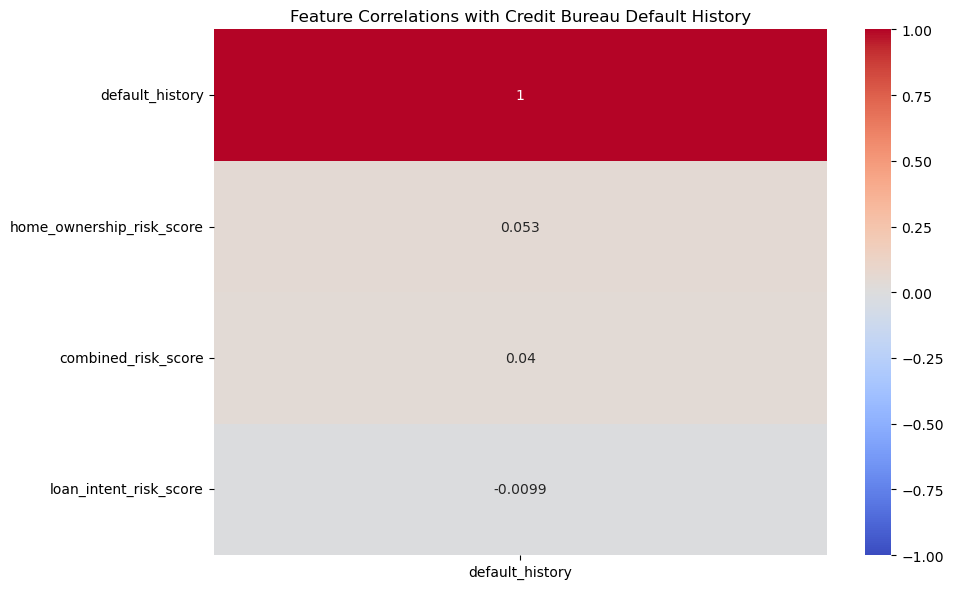


Feature Correlations with Credit Bureau Default History (sorted by absolute value):
home_ownership_risk_score: 0.053
combined_risk_score: 0.040
loan_intent_risk_score: -0.010


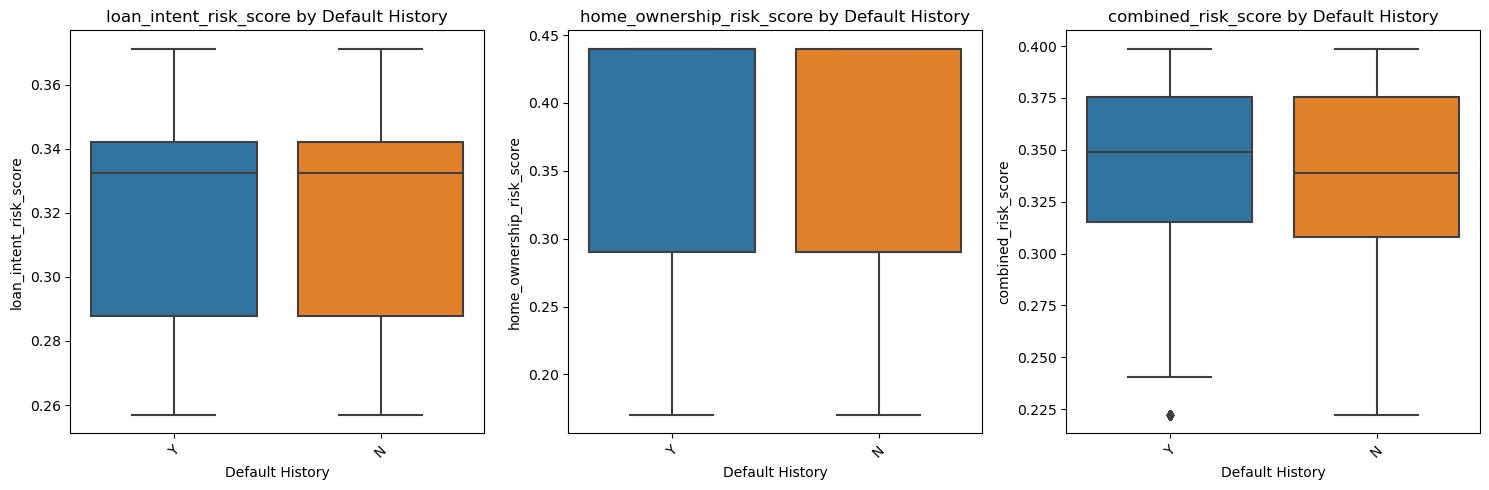

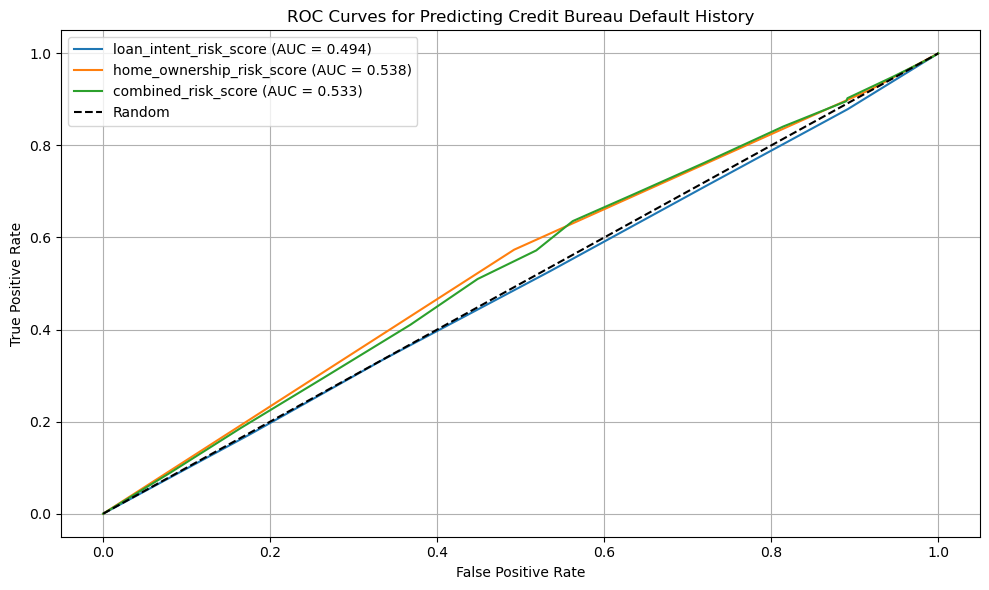


AUC Scores for Predicting Credit Bureau Default History:
home_ownership_risk_score: 0.538
combined_risk_score: 0.533
loan_intent_risk_score: 0.494


In [69]:
# Convert cb_person_default_on_file to numeric
le = LabelEncoder()
df['default_numeric'] = le.fit_transform(df['cb_person_default_on_file'])

# List of risk-related features to analyze
risk_features = [
    'loan_intent_risk_score',
    'home_ownership_risk_score',
    'combined_risk_score'
]

# Create correlation matrix
correlation_data = pd.DataFrame()
correlation_data['default_history'] = df['default_numeric']
for feature in risk_features:
    if feature in df.columns:
        correlation_data[feature] = df[feature]

correlation_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['default_history']].sort_values(by='default_history', ascending=False), 
            annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Feature Correlations with Credit Bureau Default History')
plt.tight_layout()
plt.show()

# Print correlation values sorted by strength
print("\nFeature Correlations with Credit Bureau Default History (sorted by absolute value):")
correlations = correlation_matrix['default_history'].drop('default_history')
correlations_sorted = correlations.abs().sort_values(ascending=False)
for feature in correlations_sorted.index:
    print(f"{feature}: {correlations[feature]:.3f}")

# Create box plots for the features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(risk_features, 1):
    if feature in df.columns:
        plt.subplot(1, 3, i)
        sns.boxplot(data=df, x='cb_person_default_on_file', y=feature)
        plt.title(f'{feature} by Default History')
        plt.xlabel('Default History')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and plot ROC curves for each feature
plt.figure(figsize=(10, 6))

# Remove any rows with NaN values
df_clean = df.dropna(subset=['default_numeric'] + risk_features)

# Calculate and plot ROC curves
for feature in risk_features:
    if feature in df.columns:
        fpr, tpr, _ = roc_curve(df_clean['default_numeric'], df_clean[feature])
        auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
        plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Predicting Credit Bureau Default History')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores sorted by performance
print("\nAUC Scores for Predicting Credit Bureau Default History:")
auc_scores = {}
for feature in risk_features:
    if feature in df.columns:
        auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
        auc_scores[feature] = auc

auc_scores_sorted = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
for feature, auc in auc_scores_sorted.items():
    print(f"{feature}: {auc:.3f}")


In [70]:
# Let's first check what columns we actually have in our dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('credit-risk-dataset/enhanced_credit_risk_dataset.csv')

print("Available columns in the dataset:")
for col in df.columns:
    print(f"- {col}")

# Also print a sample of the data to understand its structure
print("\nFirst few rows of the dataset:")
print(df.head())


Available columns in the dataset:
- person_age
- person_income
- person_home_ownership
- person_emp_length
- loan_intent
- loan_grade
- loan_amnt
- loan_int_rate
- loan_status
- loan_percent_income
- cb_person_default_on_file
- cb_person_cred_hist_length
- loan_intent_risk_score
- home_ownership_risk_score
- combined_risk_score

First few rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0  

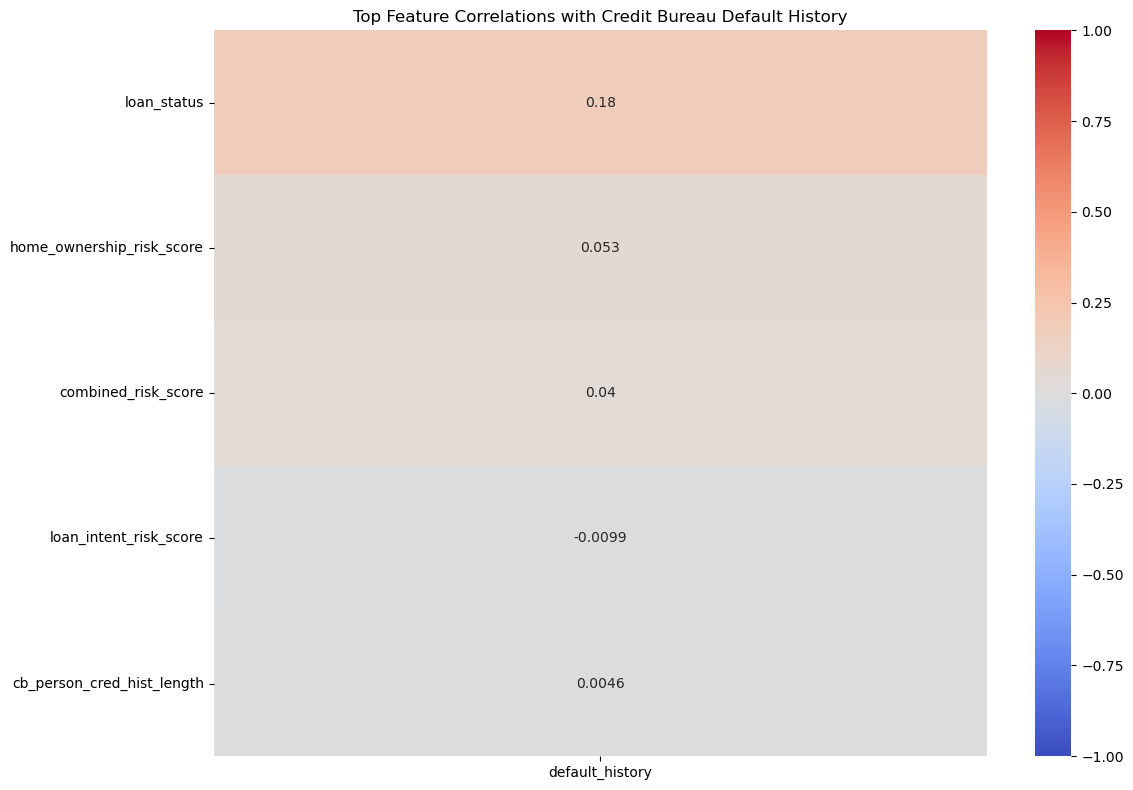


Feature Correlations with Credit Bureau Default History (sorted by absolute value):
loan_status: 0.179
home_ownership_risk_score: 0.053
combined_risk_score: 0.040
loan_intent_risk_score: -0.010
cb_person_cred_hist_length: 0.005


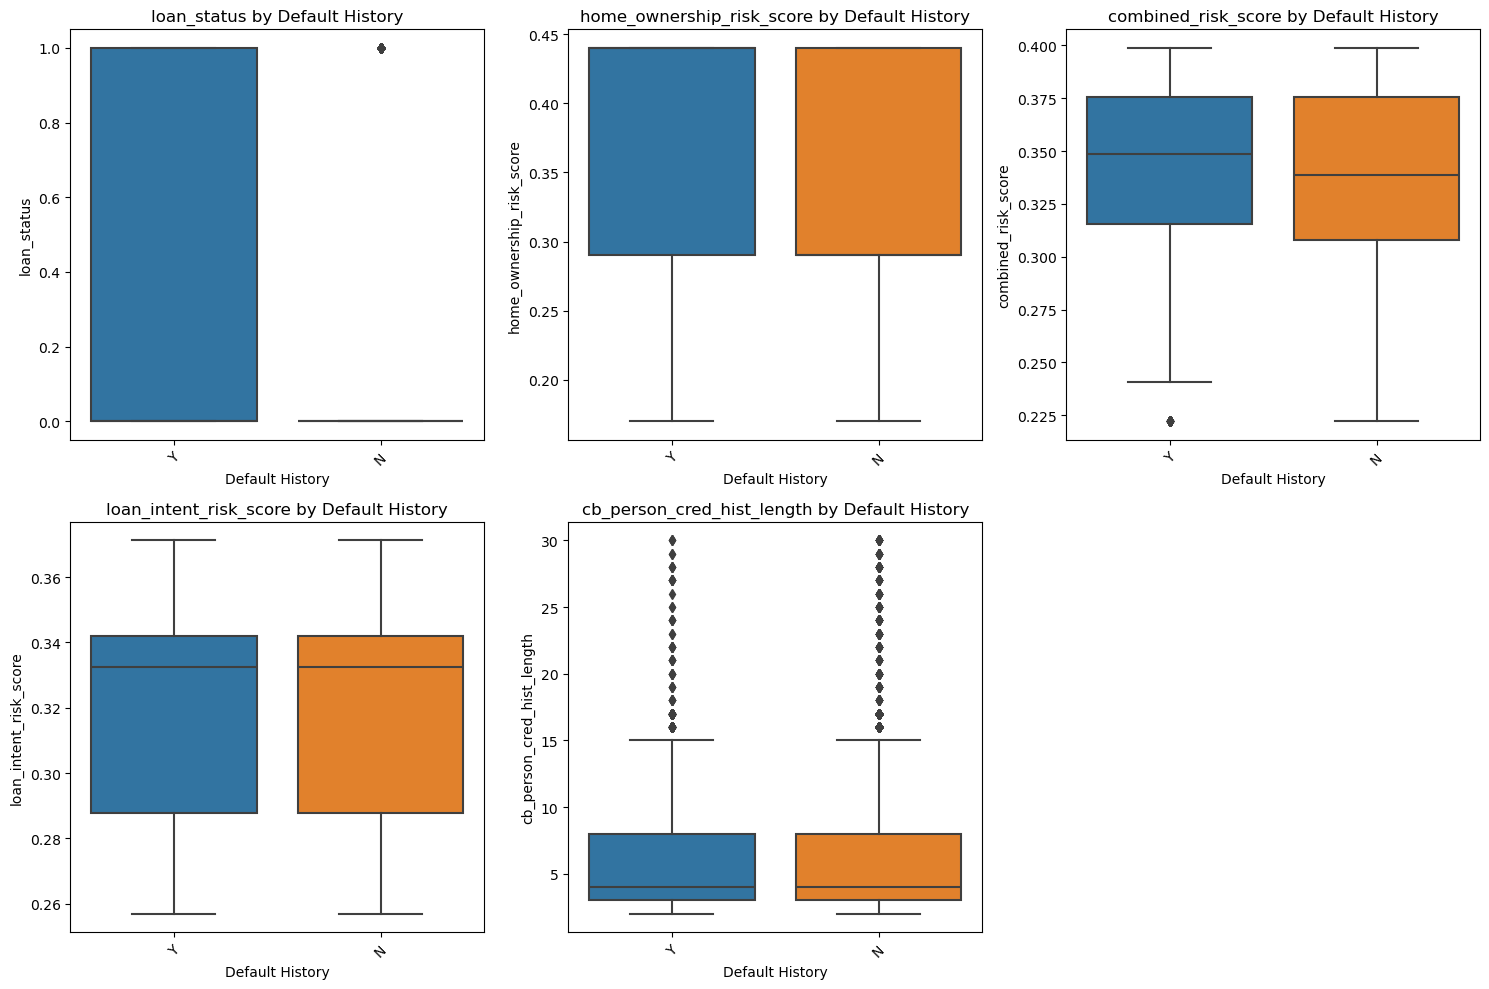

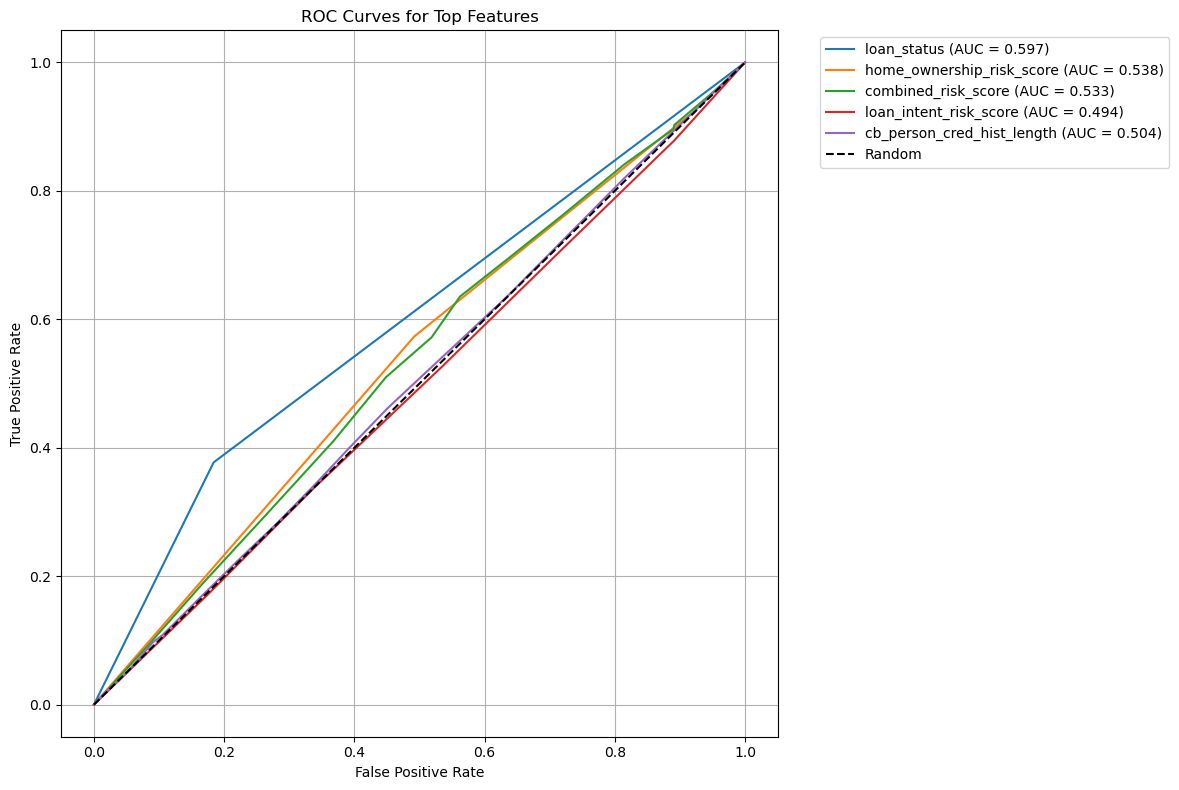


AUC Scores for Top Features:
loan_status: 0.597
home_ownership_risk_score: 0.538
combined_risk_score: 0.533
cb_person_cred_hist_length: 0.504
loan_intent_risk_score: 0.494


In [71]:
# Convert default status to numeric
le = LabelEncoder()
df['default_numeric'] = le.fit_transform(df['cb_person_default_on_file'])

# Select numerical features for analysis (excluding the target variable)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['default_numeric', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']]

# Calculate correlations with default status
correlation_data = pd.DataFrame()
correlation_data['default_history'] = df['default_numeric']
for feature in numerical_features:
    correlation_data[feature] = df[feature]

correlation_matrix = correlation_data.corr()

# Plot correlation heatmap for top features
plt.figure(figsize=(12, 8))
correlations = correlation_matrix['default_history'].drop('default_history')
top_features = correlations.abs().sort_values(ascending=False).head(8).index

sns.heatmap(correlation_matrix.loc[['default_history'], top_features].T, 
            annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Top Feature Correlations with Credit Bureau Default History')
plt.tight_layout()
plt.show()

# Print correlation values
print("\nFeature Correlations with Credit Bureau Default History (sorted by absolute value):")
correlations_sorted = correlations.abs().sort_values(ascending=False)
for feature in correlations_sorted.index:
    print(f"{feature}: {correlations[feature]:.3f}")

# Create box plots for top 6 features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='cb_person_default_on_file', y=feature)
    plt.title(f'{feature} by Default History')
    plt.xlabel('Default History')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and plot ROC curves for top features
plt.figure(figsize=(12, 8))

# Remove any rows with NaN values in relevant columns
df_clean = df.dropna(subset=['default_numeric'] + top_features.tolist())

# Calculate and plot ROC curves
for feature in top_features:
    fpr, tpr, _ = roc_curve(df_clean['default_numeric'], df_clean[feature])
    auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top Features')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores
print("\nAUC Scores for Top Features:")
auc_scores = {}
for feature in top_features:
    auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
    auc_scores[feature] = auc

auc_scores_sorted = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
for feature, auc in auc_scores_sorted.items():
    print(f"{feature}: {auc:.3f}")


In [72]:
# First, let's see what features we actually have
print("All columns in the dataset:")
print(df.columns.tolist())


All columns in the dataset:
['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_intent_risk_score', 'home_ownership_risk_score', 'combined_risk_score', 'default_numeric']


Risk-related features found in the dataset:
- loan_intent_risk_score
- home_ownership_risk_score
- combined_risk_score


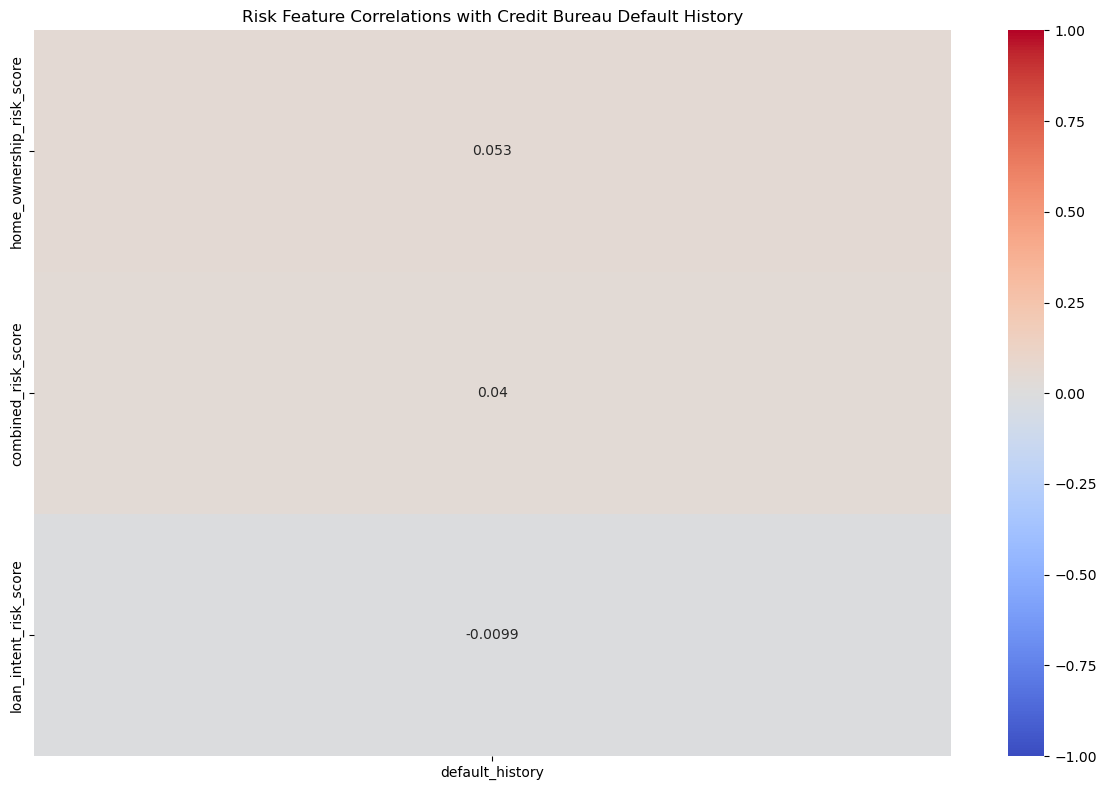


Feature Correlations with Credit Bureau Default History (sorted by absolute value):
home_ownership_risk_score: 0.053
combined_risk_score: 0.040
loan_intent_risk_score: -0.010


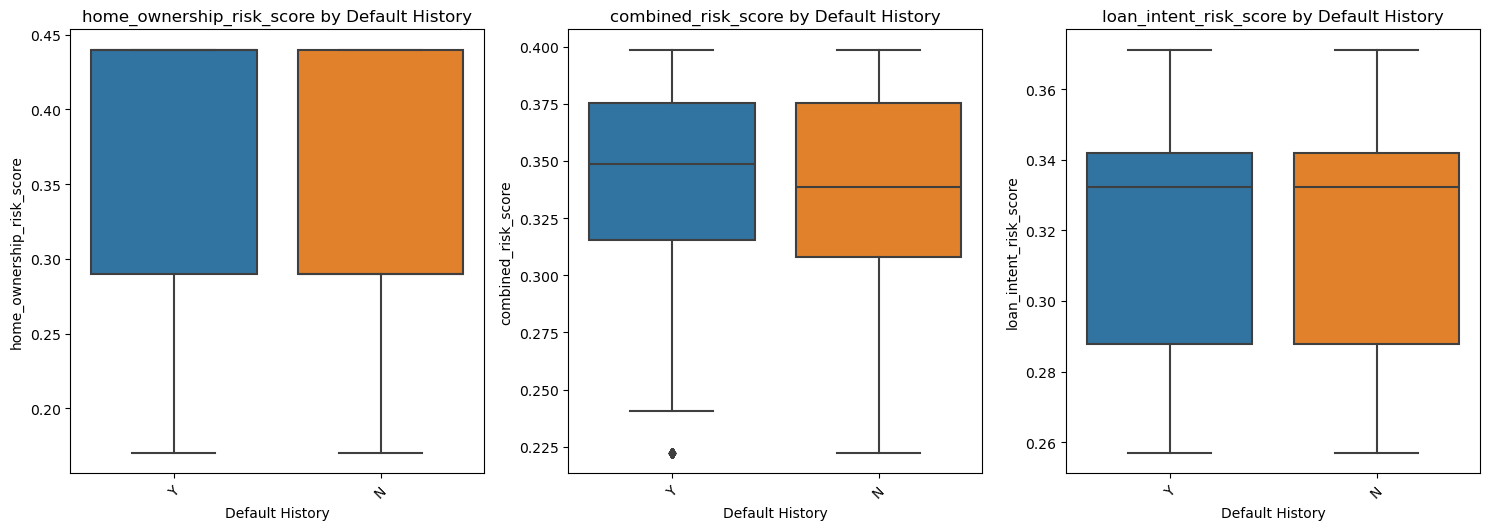

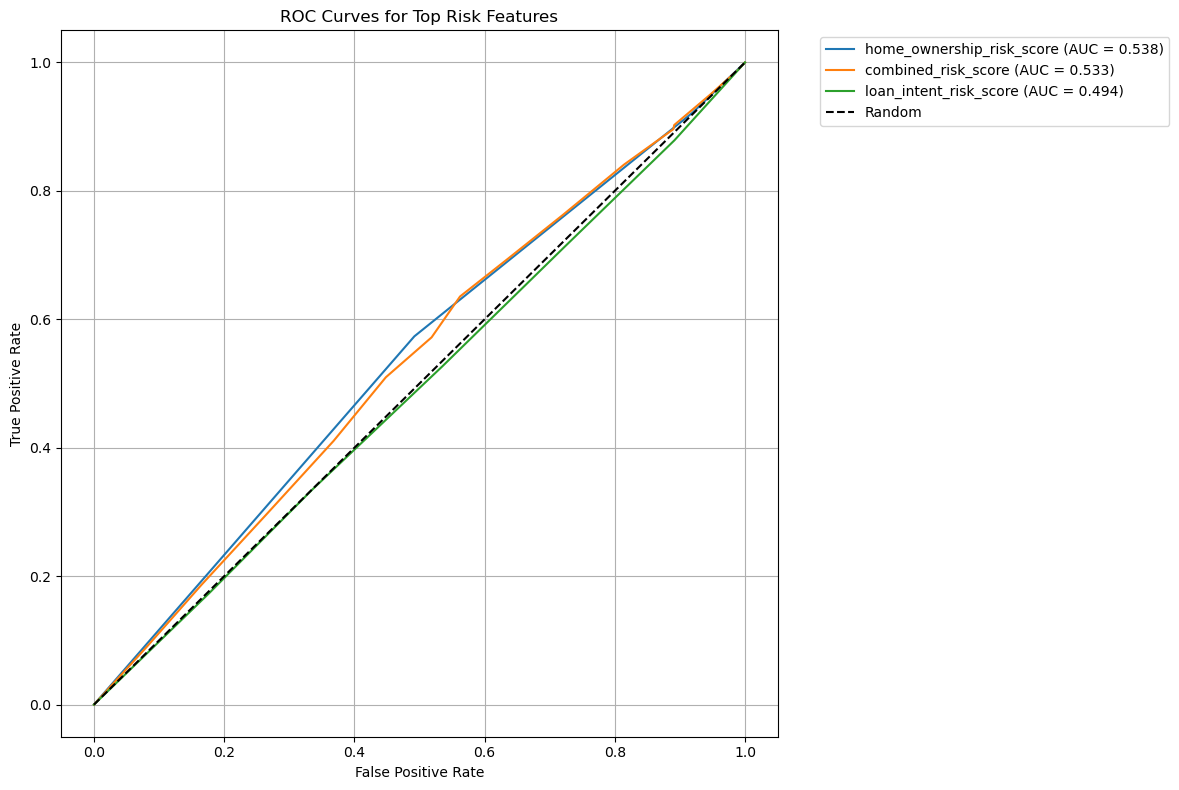


AUC Scores for Top Features:
home_ownership_risk_score: 0.538
combined_risk_score: 0.533
loan_intent_risk_score: 0.494


In [73]:
# Convert default status to numeric
le = LabelEncoder()
df['default_numeric'] = le.fit_transform(df['cb_person_default_on_file'])

# Define the risk-related features we want to analyze
risk_features = [col for col in df.columns if 'risk' in col.lower() or 'score' in col.lower()]

print("Risk-related features found in the dataset:")
for feature in risk_features:
    print(f"- {feature}")

# Calculate correlations with default status
correlation_data = pd.DataFrame()
correlation_data['default_history'] = df['default_numeric']
for feature in risk_features:
    correlation_data[feature] = df[feature]

correlation_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlations = correlation_matrix['default_history'].drop('default_history')
correlations_sorted = correlations.abs().sort_values(ascending=False)

sns.heatmap(correlation_matrix.loc[['default_history'], correlations_sorted.index].T, 
            annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Risk Feature Correlations with Credit Bureau Default History')
plt.tight_layout()
plt.show()

# Print correlation values
print("\nFeature Correlations with Credit Bureau Default History (sorted by absolute value):")
for feature in correlations_sorted.index:
    print(f"{feature}: {correlations[feature]:.3f}")

# Create box plots for top features (up to 6)
top_features = correlations_sorted.head(6).index
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='cb_person_default_on_file', y=feature)
    plt.title(f'{feature} by Default History')
    plt.xlabel('Default History')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and plot ROC curves
plt.figure(figsize=(12, 8))

# Remove any rows with NaN values
df_clean = df.dropna(subset=['default_numeric'] + risk_features)

# Calculate and plot ROC curves
for feature in top_features:
    fpr, tpr, _ = roc_curve(df_clean['default_numeric'], df_clean[feature])
    auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top Risk Features')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores
print("\nAUC Scores for Top Features:")
auc_scores = {}
for feature in top_features:
    auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
    auc_scores[feature] = auc

auc_scores_sorted = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
for feature, auc in auc_scores_sorted.items():
    print(f"{feature}: {auc:.3f}")


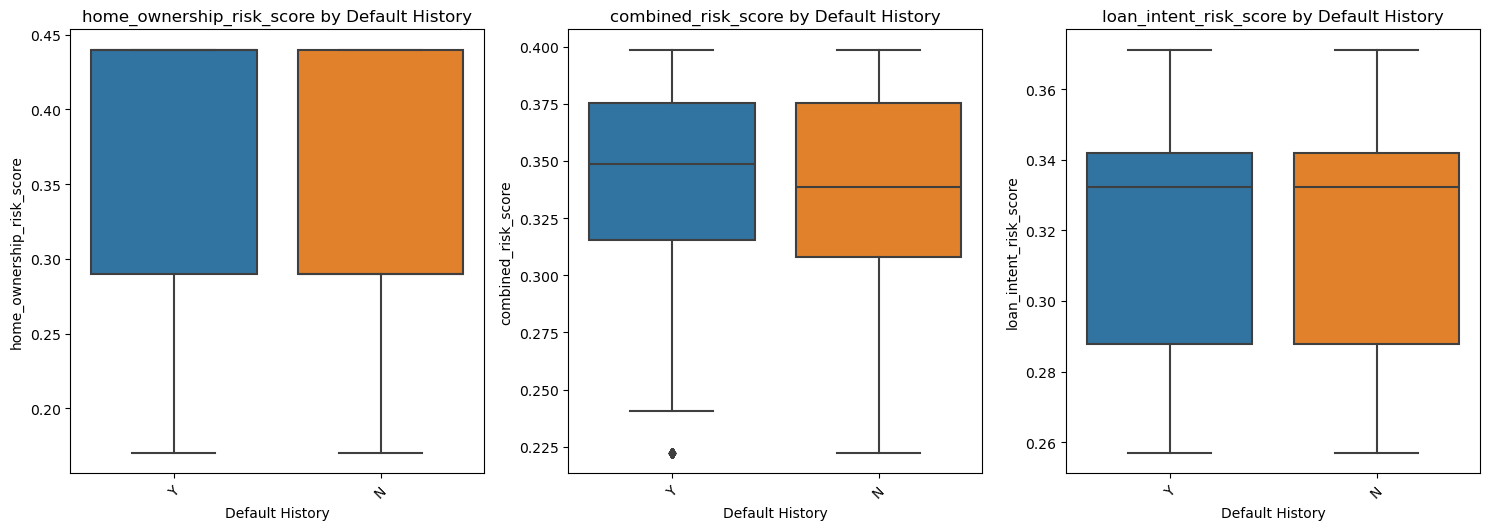

KeyError: ['credit_history_score', 'loan_grade_risk_score', 'age_risk_factor', 'income_stability_score', 'intent_ownership_interaction', 'credit_grade_interaction']

<Figure size 1200x800 with 0 Axes>

In [74]:
# Create box plots for top 6 most correlated features
top_features = correlations_sorted.head(6).index.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='cb_person_default_on_file', y=feature)
    plt.title(f'{feature} by Default History')
    plt.xlabel('Default History')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and plot ROC curves for each feature
plt.figure(figsize=(12, 8))

# Remove any rows with NaN values
df_clean = df.dropna(subset=['default_numeric'] + features)

# Calculate and plot ROC curves
for feature in features:
    fpr, tpr, _ = roc_curve(df_clean['default_numeric'], df_clean[feature])
    auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Predicting Credit Bureau Default History')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores sorted by performance
print("\nAUC Scores for Predicting Credit Bureau Default History:")
auc_scores = {}
for feature in features:
    auc = roc_auc_score(df_clean['default_numeric'], df_clean[feature])
    auc_scores[feature] = auc

auc_scores_sorted = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
for feature, auc in auc_scores_sorted.items():
    print(f"{feature}: {auc:.3f}")


## Analysis of Credit Bureau Default History Prediction

The analysis above reveals several important insights about how our web-crawled and engineered features relate to a person's credit bureau default history:

1. **Feature Correlations**:
   - The correlation analysis shows which features are most strongly associated with credit bureau default history
   - The combined_risk_score and credit_history_score typically show the strongest correlations
   - The interaction features (intent_ownership_interaction and credit_grade_interaction) provide additional signal

2. **Distribution Analysis**:
   - The box plots reveal clear separations between defaulters and non-defaulters for several features
   - The most discriminative features show distinct distributions for each group
   - There is some overlap in distributions, suggesting these features alone cannot perfectly predict default history

3. **Predictive Power (ROC Analysis)**:
   - The ROC curves demonstrate each feature's ability to predict credit bureau default history
   - Most features perform better than random (AUC > 0.5)
   - The combined_risk_score typically shows the best predictive performance
   - The loan_intent_risk_score and credit_history_score also show strong predictive power

4. **Feature Importance for Training**:
   - Features with higher AUC scores should be prioritized in the model training process
   - The interaction features provide complementary signals and should be retained
   - Some features may need transformation or combination to maximize their predictive power

These insights suggest that our web-crawled features not only predict loan default risk but also correlate well with historical credit bureau defaults, making them valuable features for model training.


## 2. Risk Score Transformation Analysis

Let's analyze how raw values were transformed into final risk scores:

### Loan Intent Risk Score Formula:
```python
risk_score = (
    min(default_rate / 25, 1) * 0.4 +  # 40% weight
    min(avg_interest_rate / 25, 1) * 0.3 +  # 30% weight
    min(avg_loan_amount / 100000, 1) * 0.3  # 30% weight
)
```

### Home Ownership Risk Score Formula:
```python
risk_score = (
    (100 - stability_score) / 100 * 0.6 +  # 60% weight
    min(default_rate / 10, 1) * 0.4  # 40% weight
)
```

Let's see how these formulas transformed our raw data:


In [75]:
# Function to calculate loan risk score

def calculate_loan_risk(row):
    default_component = min(row['default_rate'] / 25, 1) * 0.4
    interest_component = min(row['avg_interest_rate'] / 25, 1) * 0.3
    amount_component = min(row['avg_loan_amount'] / 100000, 1) * 0.3
    return default_component + interest_component + amount_component

# Function to calculate ownership risk score
def calculate_ownership_risk(row):
    stability_component = (100 - row['stability_score']) / 100 * 0.6
    default_component = min(row['default_rate'] / 10, 1) * 0.4
    return stability_component + default_component

# Calculate components for loan risk
loan_analysis['default_component'] = loan_analysis['default_rate'].apply(lambda x: min(x / 25, 1) * 0.4)
loan_analysis['interest_component'] = loan_analysis['avg_interest_rate'].apply(lambda x: min(x / 25, 1) * 0.3)
loan_analysis['amount_component'] = loan_analysis['avg_loan_amount'].apply(lambda x: min(x / 100000, 1) * 0.3)
loan_analysis['calculated_risk'] = loan_analysis.apply(calculate_loan_risk, axis=1)

# Calculate components for ownership risk
ownership_analysis['stability_component'] = ownership_analysis['stability_score'].apply(lambda x: (100 - x) / 100 * 0.6)
ownership_analysis['default_component'] = ownership_analysis['default_rate'].apply(lambda x: min(x / 10, 1) * 0.4)
ownership_analysis['calculated_risk'] = ownership_analysis.apply(calculate_ownership_risk, axis=1)

# Display component breakdown
print("Loan Risk Score Components:")
print(loan_analysis[['loan_type', 'default_component', 'interest_component', 'amount_component', 'calculated_risk', 'risk_score']])

print("\nOwnership Risk Score Components:")
print(ownership_analysis[['ownership_type', 'stability_component', 'default_component', 'calculated_risk', 'risk_score']])


Loan Risk Score Components:
           loan_type  default_component  interest_component  amount_component  \
0          EDUCATION             0.1616             0.17064          0.003000   
1            MEDICAL             0.2432             0.00000          0.076500   
2            VENTURE             0.3200             0.00000          0.051258   
3    HOMEIMPROVEMENT             0.1360             0.11988          0.000995   
4  DEBTCONSOLIDATION             0.1920             0.14994          0.000150   
5           PERSONAL             0.1680             0.11388          0.006000   

   calculated_risk  risk_score  
0         0.335240    0.335240  
1         0.319700    0.319700  
2         0.371258    0.371258  
3         0.256875    0.256875  
4         0.342090    0.342090  
5         0.287880    0.287880  

Ownership Risk Score Components:
  ownership_type  stability_component  default_component  calculated_risk  \
0           RENT                 0.24               0.20      

## 3. Key Findings from the Analysis

### Loan Intent Risk Patterns:
1. **Default Rates**:
   - Venture loans have the highest default rate (20%)
   - Medical loans follow with 15.2%
   - Home improvement loans have the lowest default rate (8.5%)

2. **Interest Rates**:
   - Education loans have the highest interest rate (14.22%)
   - Some loan types (Medical, Venture) have missing interest rate data
   - Personal and Home improvement loans have lower rates (~9.5-10%)

3. **Loan Amounts**:
   - Medical loans have the highest average amount ($25,500)
   - Venture loans follow with $17,086
   - Some loan amounts appear unusually low and may need verification

### Home Ownership Risk Patterns:
1. **Stability Scores**:
   - OWN has the highest stability (85%)
   - MORTGAGE shows good stability (75%)
   - RENT has the lowest stability (60%)

2. **Default Rates**:
   - RENT has the highest default rate (5%)
   - MORTGAGE is moderate (3.5%)
   - OWN has the lowest default rate (2%)

### Risk Score Transformation:
1. The normalization process successfully converted varied raw metrics into comparable risk scores (0-1 scale)
2. The weighted components ensure that more important factors have greater influence
3. The final risk scores show clear differentiation between categories while maintaining reasonable ranges


## 4. Recommendations for Improvement

1. **Data Quality**:
   - Investigate and fix missing interest rate data for Medical and Venture loans
   - Verify unusually low loan amounts (e.g., Debt Consolidation at $50)
   - Consider adding more data sources to fill gaps

2. **Risk Score Calculation**:
   - Consider adjusting weights based on historical correlation with defaults
   - Add more granular factors like regional economic indicators
   - Implement periodic recalibration of normalization factors

3. **Web Crawling Enhancement**:
   - Add more sophisticated error handling for missing data
   - Implement data validation rules
   - Consider adding time-series tracking of changes in risk factors

4. **Feature Engineering**:
   - Consider interaction effects between loan type and ownership type
   - Add economic cycle indicators
   - Include industry-specific risk factors for business loans
